# Use PyTorch to train linear and logistic regressions.

Simulate linear and logistic regressions. Use PyTorch to recover the true values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


## Logistic regression example 1

In [3]:
N = 1000; D = 4; K = 3; # know N, D, and K
w = np.random.random((D, K-1))*10 # use K-1 because it is identifiable in estimation
w = np.concatenate((np.zeros((D, 1)), w), axis = 1) 
y, X = util.gen_multiple_choice_data(N, D, K, w)

In [4]:
# print(y)
# print(X)
print(w)

[[0.         3.87636046 8.06844608]
 [0.         9.47307596 2.92279439]
 [0.         9.84289957 1.98111079]
 [0.         0.1366462  0.74166592]]


In [5]:
# cuda device
device_id = torch.cuda.device_count()
print(device_id) # 0 and 1 are both available
# if torch.cuda.is_available():
device_0 = torch.device("cuda:0")
device_1 = torch.device("cuda:1")
print(device_0)
print(device_1)

2
cuda:0
cuda:1


In [6]:
X_torch = torch.from_numpy(X)
y_torch = torch.from_numpy(y)
w_torch = torch.randn(4, 3, requires_grad = True, dtype = torch.double)

In [7]:
def model(inputs):
    U = torch.matmul(inputs, w_torch)
    return U

print(model(X_torch))

tensor([[-1.9491, -0.2354, -0.2943],
        [ 2.0769,  0.4156,  0.1282],
        [ 0.9985,  2.2843,  1.0736],
        ...,
        [ 0.4647,  1.3650,  0.8925],
        [-0.9256, -2.0626, -1.4511],
        [-0.1128,  0.3966,  0.1262]], dtype=torch.float64,
       grad_fn=<MmBackward>)


True w is:  [[0.         3.87636046 8.06844608]
 [0.         9.47307596 2.92279439]
 [0.         9.84289957 1.98111079]
 [0.         0.1366462  0.74166592]]
Learnt w is:  tensor([[ 1.1622,  1.5789,  0.8825],
        [-0.7149,  0.8155,  0.2295],
        [-0.0621,  0.5774,  0.2981],
        [ 0.0531,  0.7800,  0.0961]], dtype=torch.float64, requires_grad=True)


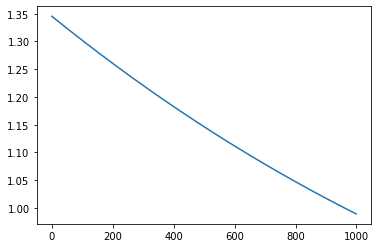

In [8]:
# training set up 1.
criterion = nn.CrossEntropyLoss()
n_epoch = 1000
loss_list = []

# training
for i in range(n_epoch):
    U = model(X_torch)
    loss = criterion(U, y_torch)
    loss_list.append(loss.item())
    loss.backward()
    # update coefficients.
    with torch.no_grad():
        w_torch -= w_torch.grad * 1e-3
        w_torch.grad.zero_()

# check.
print("True w is: ", w)
print("Learnt w is: ", w_torch)
plt.plot(loss_list)

## Logistic regression example 2

True w is:  [[0.         3.87636046 8.06844608]
 [0.         9.47307596 2.92279439]
 [0.         9.84289957 1.98111079]
 [0.         0.1366462  0.74166592]]
Learnt w is:  tensor([[-1.9492,  0.9414,  0.2377],
        [-0.9784,  0.4168, -0.0909],
        [ 0.6762, -0.6026, -0.8796],
        [-0.5333,  0.9961, -0.5187]], dtype=torch.float64, requires_grad=True)


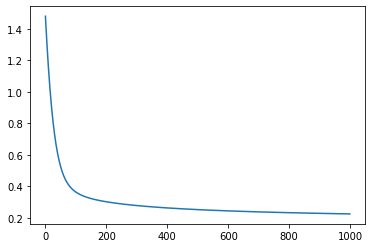

In [15]:
# training set up 2.
# generate data
X_torch = torch.from_numpy(X)
y_torch = torch.from_numpy(y)
w_torch = torch.randn(4, 3, requires_grad = True, dtype = torch.double)

# class
class SimpleLinear(nn.Module):
    def __init__(self):
        super().__init__()
        # sw: note the way to define parameters. Use nn.Parameter() class
        self.w = nn.Parameter(torch.randn(4, 3, requires_grad = True, dtype = torch.double))
        
    def forward(self, x):
        x = torch.matmul(x, self.w)
        return x

# opt
model = SimpleLinear()
# model.parameters()
opt = torch.optim.SGD(model.parameters(), 1e-1)
criterion = nn.CrossEntropyLoss()
n_epoch = 1000
loss_list = []

# training
for i in range(n_epoch):
    output = model(X_torch)
    loss = criterion(output, y_torch)
    loss.backward()
    loss_list.append(loss.item())
    with torch.no_grad():
        opt.step()
        opt.zero_grad()
        
# 
plt.plot(loss_list)
print("True w is: ", w)
print("Learnt w is: ", w_torch)